In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [79]:
train_df=pd.read_csv(r"C:\Users\sahua\OneDrive\Desktop\Data_science\Prodigy_DataScience\Task_2\train.csv")
test_df=pd.read_csv(r"C:\Users\sahua\OneDrive\Desktop\Data_science\Prodigy_DataScience\Task_2\test.csv")

#### Data profiling

In [80]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
train_df.shape

(891, 12)

In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [84]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [89]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### Data handling

In [90]:
train_df.duplicated().sum()

0

In [91]:
test_df.duplicated().sum()

0

In [92]:
nv = train_df.isna().sum().sort_values(ascending=False)
nv

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [93]:
nv1 = test_df.isna().sum().sort_values(ascending=False)
nv1

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [94]:
train_df.drop(columns = 'Cabin', axis = 1, inplace = True)
test_df.drop(columns = 'Cabin', axis = 1, inplace = True)

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)
test_df=test_df.ffill()

In [98]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [99]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [100]:
train_df['Survived'].unique()

array([0, 1], dtype=int64)

In [101]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [102]:
train_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [103]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [104]:
train_df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
test_df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

#### Data visualization

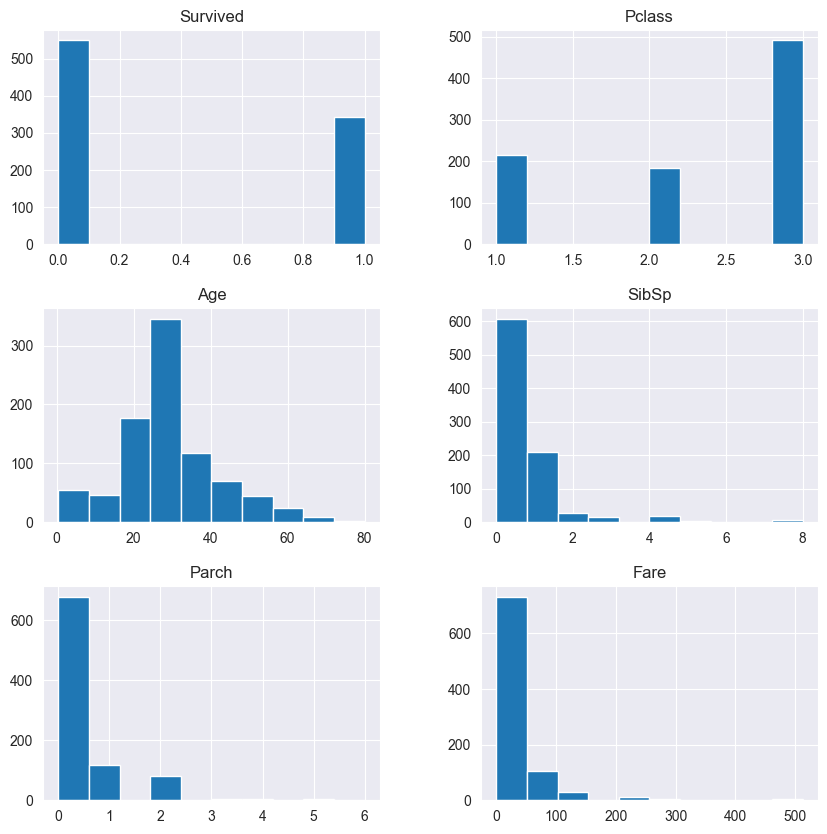

In [105]:
train_df.hist(figsize=(10,10))
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

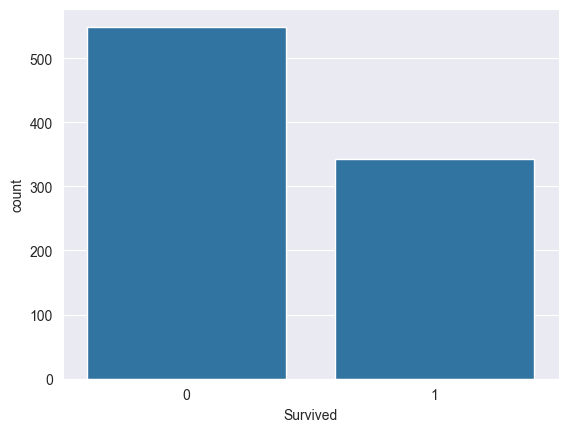

In [106]:
sns.set_style("darkgrid")
sns.countplot(x="Survived", data=train_df)

This plot Clearly shows most people are died

<Axes: xlabel='Pclass', ylabel='count'>

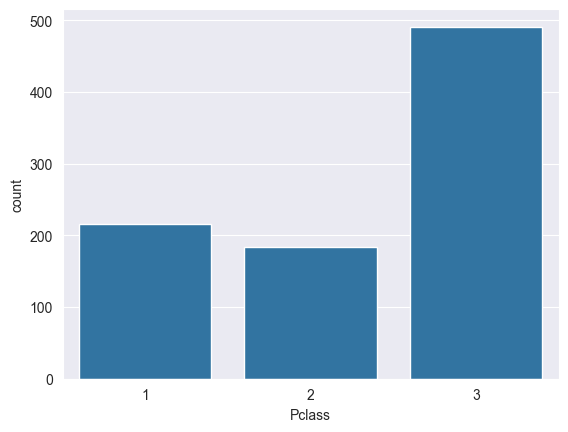

In [107]:
sns.countplot(x="Pclass", data=train_df)

In [108]:
cat_cols = train_df.select_dtypes(include='object').columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

Sex
male      577
female    314
Name: count, dtype: int64


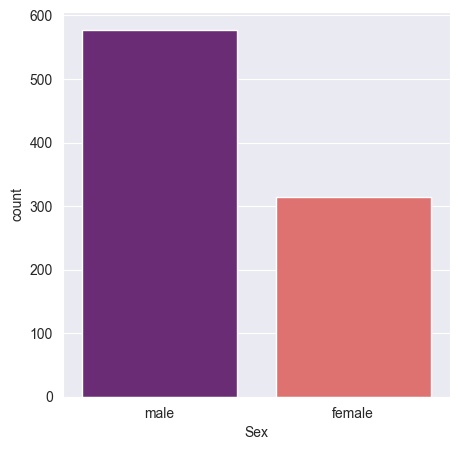

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


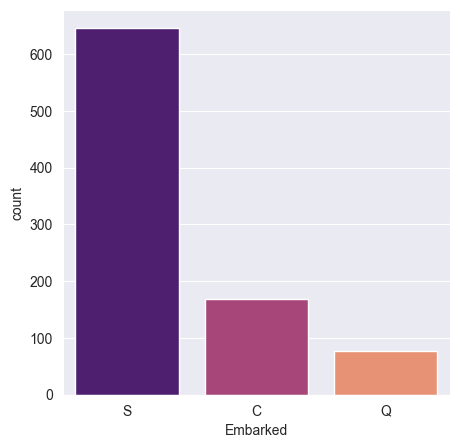

In [109]:
for i in cat_cols:
    print(train_df[i].value_counts())
    plt.figure(figsize=(5,5))
    sns.countplot(x=train_df[i],palette='magma')
    plt.xlabel(i)
    plt.show()

Plot clearly shows that most of the people choose Southampton as their port of embarkation.

<Axes: xlabel='Survived', ylabel='count'>

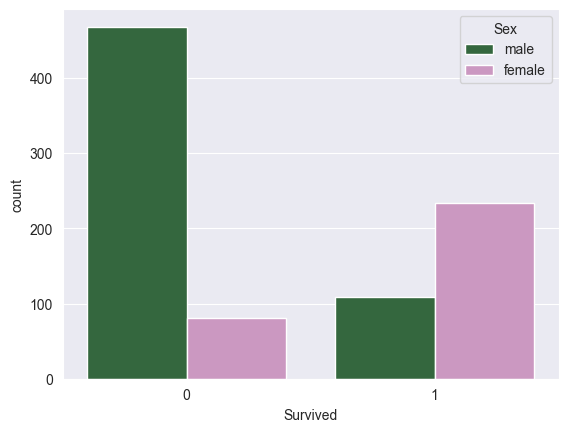

In [110]:
sns.countplot(x="Survived", hue="Sex", data=train_df, palette="cubehelix")

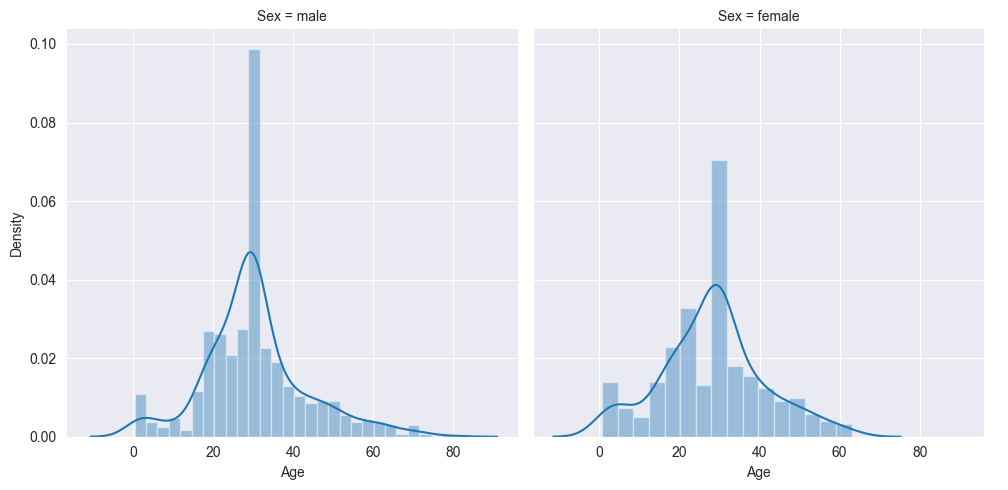

In [111]:
d1 = sns.FacetGrid(train_df, col="Sex",height=5)
d1 = (d1.map(sns.distplot, "Age").add_legend())

We can see proportion of both males and females are generally lies between 20-40 age group

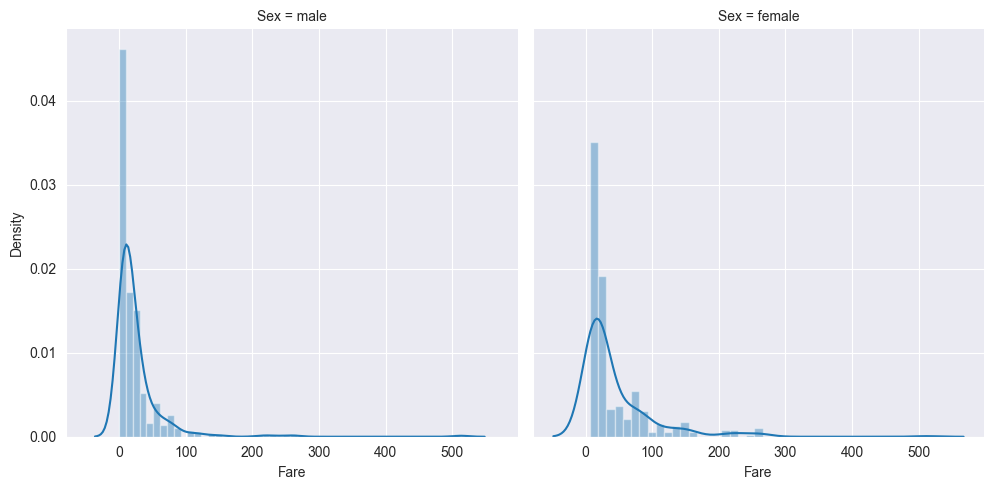

In [112]:
d2 = sns.FacetGrid(train_df, col="Sex",height=5)
d2 = (d2.map(sns.distplot, "Fare").add_legend())

From the Plot we can see that for both the genders , the price of the ticket are generally lies between 0 to 100. But, the density of the ticket is more for males.

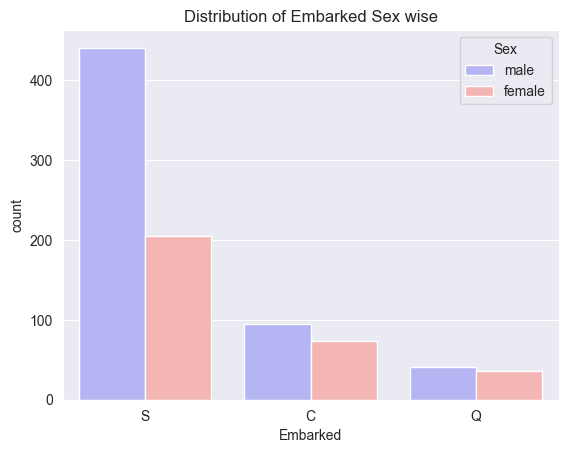

In [113]:
sns.countplot(x=train_df['Embarked'],hue=train_df['Sex'],palette='bwr')
plt.title('Distribution of Embarked Sex wise')
plt.show()

We can Clearly see both kind of peoples either males or females mostly choose Southampton as their port of embarkation.

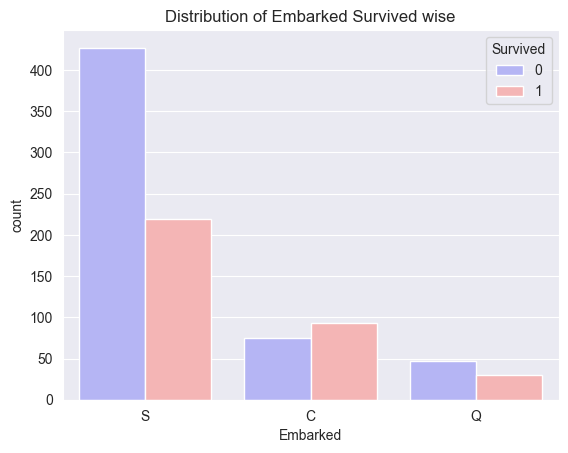

In [114]:
sns.countplot(x=train_df['Embarked'],hue=train_df['Survived'],palette='bwr')
plt.title('Distribution of Embarked Survived wise')
plt.show()

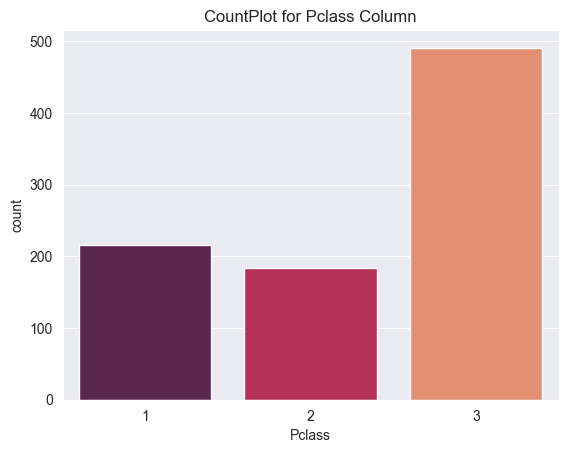

In [115]:
sns.countplot(x=train_df['Pclass'],palette='rocket')
plt.title('CountPlot for Pclass Column')
plt.show()

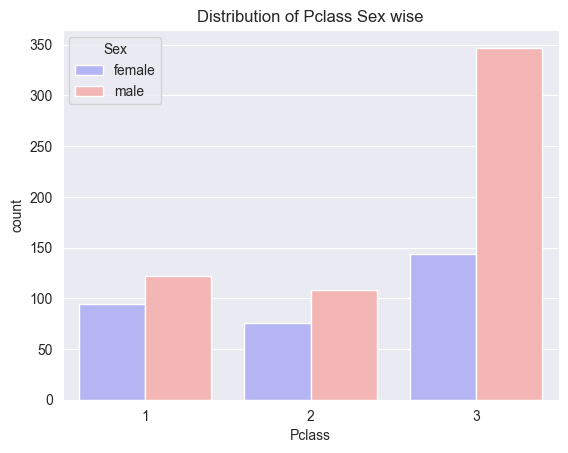

In [116]:
sns.countplot(x=train_df['Pclass'],hue=train_df['Sex'],palette='bwr')
plt.title('Distribution of Pclass Sex wise')
plt.show()

In [118]:
data=train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


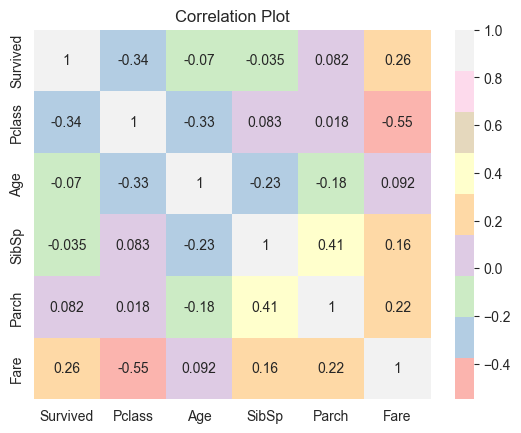

In [119]:
sns.heatmap(data.corr(),annot=True,cmap='Pastel1')
plt.title('Correlation Plot')
plt.show()

#### Model Training

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [121]:
train_df.loc[train_df['Sex'] == 'male', 'Sex',] = 1
train_df.loc[train_df['Sex'] == 'female', 'Sex',] = 0
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [122]:
train_df.shape , test_df.shape

((891, 8), (418, 7))

In [123]:
xr=train_df.drop(columns=['Embarked', 'Survived'])
yr=train_df["Survived"]

In [124]:
yr.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### Logistic Regression

In [125]:
x_train,x_test,y_train,y_test=train_test_split(xr,yr,train_size=0.8,random_state=7)
lr_model=LogisticRegression()

In [126]:
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

In [127]:
y_pred[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [128]:
y_test[0:10]

725    0
861    0
528    0
46     0
627    1
357    0
890    0
179    0
562    0
879    1
Name: Survived, dtype: int64

In [129]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.770949720670391

#### KNN classifier

In [130]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_array=[]
best_accuracy=0  
best_k=0
ks=range(2,int(len(x_train)/2))

for k in ks:
    model_knn=KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(x_train,y_train)
    y_pred=model_knn.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_array.append(accuracy)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_k=k
print("best_k",best_k)
print("best_accuracy",best_accuracy)

best_k 17
best_accuracy 0.7374301675977654
